# Test Plots zum Verstaendnis


In [1]:
import genetic_algorithm as ga 
import scipy.signal as sig
import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
import math


ORDER = 10


[-418.46 -726.07  600.59]
[ 0.01072958 -0.07817567  0.36998581]


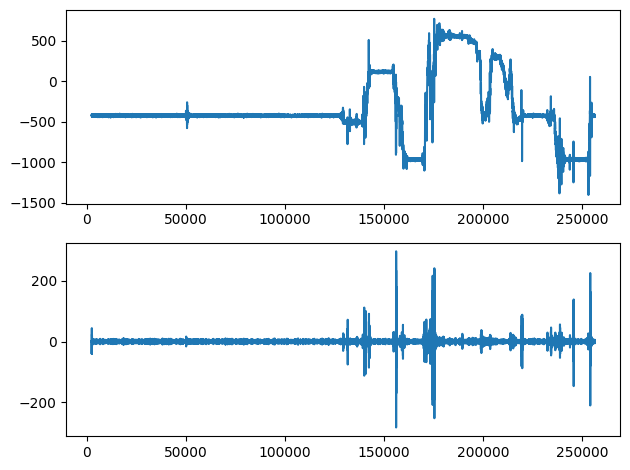

In [2]:


raw_measurements = ga.get_measurements('../../Datalogs/IMU_0.txt') # Format of Raw Measurements is that as in the datalogs

print(raw_measurements[1, 1:4])
    #dp.plot_measurements_out_of_data(raw_measurements)

# Low and Highfilter of the Accelerometer
lowpass_filter_acc = sig.butter(ORDER, 15.0, btype="lowpass", output="sos", fs=100.0)
highpass_filter_acc = sig.butter(ORDER, 40.0, btype="highpass", output="sos", fs=100.0)

time = raw_measurements[:, 0]
acc_x = raw_measurements[:,1]

filtered_acc_x = sig.sosfilt(highpass_filter_acc, acc_x) # ACC_X
print(filtered_acc_x[1:4])

# Plot Raw Measurement and Original Data
fig = plot.figure(tight_layout=True)
gs = gridspec.GridSpec(2,1)
ax = fig.add_subplot(gs[0,0])
ax.plot(time, acc_x)
ax = fig.add_subplot(gs[1,0])
ax.plot(time, filtered_acc_x)
plot.show()



[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90.
 91. 92. 93. 94. 95. 96. 97. 98. 99.]
28298
(28298,)
100


c:\Users\veigh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\veigh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


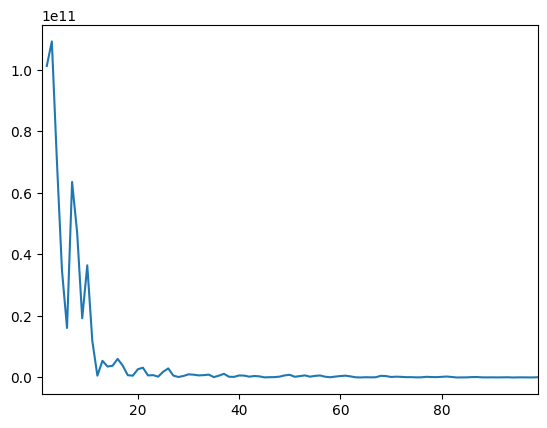

In [3]:
import scipy.fft as fft
import numpy as np

dt = 0.01 # sample intervall

sample_rate = 1/dt

acc_x_fft = fft.fft(acc_x)
power_spectrum_density = acc_x_fft * np.conj(acc_x_fft) / sample_rate

frequencies = np.arange(1, sample_rate)
print(frequencies)

print(len(power_spectrum_density))
print(np.shape(power_spectrum_density))
psd = power_spectrum_density[:100]

print(len(psd))

k = np.arange(1,99,dtype='int')

fig, ax = plot.subplots()
plot.plot(frequencies[k], psd[k])
plot.xlim(frequencies[0], frequencies[-1])
plot.show()


In [4]:
highpass_filter_acc = sig.butter(ORDER, 40.0, btype="highpass", output="sos", fs=100.0)

a_k = np.array([-418.46, -726.07 , 600.59])

print(np.linalg.norm(a_k))
hpf_a_k = np.array([0.01072958 ,-0.07817567 , 0.36998581])
print(np.linalg.norm(hpf_a_k))

low_a_k = sig.sosfilt(lowpass_filter_acc, hpf_a_k)
print(low_a_k)
print(np.linalg.norm(low_a_k))

1031.0163745547402
0.3783068316436824
[5.32332147e-07 3.56750853e-06 1.34426247e-05]
1.391814118652343e-05


In [5]:
lowpass_filter_mag = sig.butter(ORDER, 15, btype="lowpass", output="sos", fs=100)
highpass_filter_mag = sig.butter(ORDER, 45, btype="highpass", output="sos", fs=100)

mag_measurements = raw_measurements[:, 7:10]
print(mag_measurements)

hpf_mag = sig.sosfilt(highpass_filter_mag, mag_measurements)
print(hpf_mag[0])
print(np.linalg.norm(hpf_mag[0]))

low_mag = sig.sosfilt(lowpass_filter_mag, hpf_mag)
print(low_mag[0])
print(np.linalg.norm(low_mag))

[[-16.95 -18.45  90.9 ]
 [-16.5  -17.85  92.1 ]
 [-16.2  -17.7   92.7 ]
 ...
 [ -8.85  -5.25  99.6 ]
 [ -8.85  -5.25  99.6 ]
 [ -8.25  -6.6   99.  ]]
[-6.13538316e-08  1.03711296e-06 -8.27909897e-06]
8.344030637549836e-06
[-3.04397906e-12  8.87668956e-12  2.68503057e-11]
4.937641619488169e-09


In [6]:
lowpass_filter_gyro = sig.butter(ORDER,10, btype="lowpass", output="sos", fs=100)

gyro_meas = raw_measurements[:, 4:7]
print(gyro_meas)

low_gyro = sig.sosfilt(lowpass_filter_gyro, gyro_meas)
print(low_gyro[0])
print(np.linalg.norm(low_gyro[0]))

[[-1.03  1.24  0.5 ]
 [-0.05  1.18 -0.18]
 [ 1.56  0.26  2.43]
 ...
 [ 0.23 -1.41  1.89]
 [-0.69 -0.76  2.86]
 [-1.44  0.02  0.21]]
[-1.73408885e-06 -2.56362600e-05 -1.80904138e-04]
0.00018271981822567685


In [16]:
arr = np.array([[1,2], [3, 4],[5,6],[7,8]])

list = [[1,2], [3,4], [5,6] ,[7,52]]

list_array = np.array([_ for _ in list if _ !=[5,6]])
print(list_array)

[[ 1  2]
 [ 3  4]
 [ 7 52]]


In [31]:
arr = np.array([[-1.83617034, 4.20856835, 1.19121706, 3.84737381, 0.03313134, -2.62705351,
  -3.71593679, 2.18949668, -3.26630103, -1.12124058, -0.86148964, 3.94903481],
 [4.02589187, 4.54074938, 1.97018381, -0.46793826, -4.94897208, -2.49105348,
   1.91267507, -1.31230526, -3.48319838, -2.06282907, -1.47595921, 4.06914466],
 [-3.62097524, 1.97151954, 0.71473169, -2.92145489, -1.63717219, -4.7209317,
  -3.99066659, 2.10936377, -1.03588342, 4.54931044, -3.28615608, -2.89553317],
 [3.50236184, 1.38237682, 0.67185899, -3.13834286, 4.43540432, -4.53047334,
  -4.35969357, -0.82100826, 4.90834172, 0.41598076, 3.07158424, 3.73423137],
 [1.91911905, 1.41938662, 0.4471811, -3.8417724, -0.88069392, 1.73061096,
  -0.17503765, -2.33006796, -3.52523488, 4.39411509, 4.56266249, -1.0605384],
 [1.17819223, -4.03685729, 4.91884433, 4.34335765, 4.79398668, -0.55601171,
  -0.81190889, 4.19885348, -2.0952133, -4.15140779, 3.26090089, 4.13201301],
 [4.09530167, -2.60318196, 3.93732055, 2.09802685, -0.62286587, -2.65216698,
  -4.31485939, -2.87440706, -0.12898041, -1.00486155, -4.16715515, -2.8486548],
 [0.74371124, 2.03539764, 3.57818642, -2.27697359, 3.38964736, -3.03345244,
   1.56897523, 3.53779248, 2.12051967, 0.79340532, -3.10986038, -1.22906253],
 [-3.4583366, -3.65440197, -1.95873743, 2.36618858, 3.02569223, -4.82043984,
   2.23043834, -4.59454223, -1.67476094, 4.86057361, 4.95567629, 3.91983656],
 [-1.24800365, 2.26953263, 3.88770271, -2.00012002, -1.00885567, 3.54150987,
  -0.96469654, 1.60770843, 4.44886216, 4.13831578, 4.28616362, -4.91635995]])

pick = arr[0]

new_list = [vector for vector in arr if (vector != pick).all()]

import random as rd 


list = rd.sample(new_list, 1)
list = np.array(list)
print(new_list)
print(list)



[array([ 4.02589187,  4.54074938,  1.97018381, -0.46793826, -4.94897208,
       -2.49105348,  1.91267507, -1.31230526, -3.48319838, -2.06282907,
       -1.47595921,  4.06914466]), array([-3.62097524,  1.97151954,  0.71473169, -2.92145489, -1.63717219,
       -4.7209317 , -3.99066659,  2.10936377, -1.03588342,  4.54931044,
       -3.28615608, -2.89553317]), array([ 3.50236184,  1.38237682,  0.67185899, -3.13834286,  4.43540432,
       -4.53047334, -4.35969357, -0.82100826,  4.90834172,  0.41598076,
        3.07158424,  3.73423137]), array([ 1.91911905,  1.41938662,  0.4471811 , -3.8417724 , -0.88069392,
        1.73061096, -0.17503765, -2.33006796, -3.52523488,  4.39411509,
        4.56266249, -1.0605384 ]), array([ 1.17819223, -4.03685729,  4.91884433,  4.34335765,  4.79398668,
       -0.55601171, -0.81190889,  4.19885348, -2.0952133 , -4.15140779,
        3.26090089,  4.13201301]), array([ 4.09530167, -2.60318196,  3.93732055,  2.09802685, -0.62286587,
       -2.65216698, -4.31485939,

: 